In [1]:
!pip install pandas numpy matplotlib openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Membaca dan menampilkan dataset
df = pd.read_excel('ML DATASET.xlsx')

In [4]:
df

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Indonesia,Aceh,0,5683651,5683651,5683651,129164,18401,11038,11858,...,63049,35718,54063,49773,50240,31053,33716,34795,32777,43809
1,Indonesia,Aceh,10,5683651,5090908,4996300,129164,18324,10988,11831,...,59576,34386,50990,46781,47055,29147,31009,32516,30495,40109
2,Indonesia,Aceh,15,5683651,5050170,4946857,129164,18309,10974,11827,...,59275,34260,50711,46488,46775,28961,30749,32293,30262,39752
3,Indonesia,Aceh,20,5683651,5029129,4932164,129164,18296,10965,11822,...,59024,34158,50497,46263,46545,28829,30573,32117,30096,39484
4,Indonesia,Aceh,25,5683651,5014672,4908703,129164,18289,10961,11819,...,58898,34109,50373,46141,46416,28757,30474,32020,30014,39341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Indonesia,Yogyakarta,20,317684,162947,134776,1837,84,33,9,...,62,45,71,118,150,77,61,76,40,135
260,Indonesia,Yogyakarta,25,317684,149550,126433,1837,83,32,9,...,60,44,69,114,145,74,59,74,38,122
261,Indonesia,Yogyakarta,30,317684,133243,116147,1837,83,32,9,...,58,42,66,108,139,69,55,71,35,107
262,Indonesia,Yogyakarta,50,317684,95036,71270,1837,79,31,8,...,45,32,54,83,108,52,44,54,28,76


In [5]:
# Membuat daftar kolom tc_loss_ha_2001 hingga tc_loss_ha_2023
tc_loss_columns = [f'tc_loss_ha_{year}' for year in range(2001, 2024)]

# Menambahkan kolom tc_loss_ha_total yang merupakan jumlah dari semua tahun
df['tc_loss_ha_total'] = df[tc_loss_columns].sum(axis=1)

# Menampilkan beberapa baris pertama, termasuk kolom threshold dan tc_loss_ha_total
df[['subnational1', 'threshold', 'area_ha', 'tc_loss_ha_total']].head()

,subnational1,threshold,area_ha,tc_loss_ha_total
0,Aceh,0,5683651,851734
1,Aceh,10,5683651,820472
2,Aceh,15,5683651,817494
3,Aceh,20,5683651,815185
4,Aceh,25,5683651,813944


In [6]:
# Menampilkan semua nama kolom dalam DataFrame
pd.DataFrame(df.columns, columns=['Column Names'])

,Column Names
0,country
1,subnational1
2,threshold
3,area_ha
4,extent_2000_ha
5,extent_2010_ha
6,gain_2000-2020_ha
7,tc_loss_ha_2001
8,tc_loss_ha_2002
9,tc_loss_ha_2003


In [7]:
# Memisahkan data berdasarkan nilai threshold
threshold_values = [0, 10, 15, 20, 25, 30, 50, 75]  # Tentukan nilai threshold sesuai keinginan

# Membuat dictionary untuk menampung data yang sudah dipisah
threshold_data = {}

for value in threshold_values:
    threshold_data[value] = df[df['threshold'] == value]

# Menampilkan hasil untuk setiap threshold
threshold_data[0].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
0,Indonesia,Aceh,0,5683651,5683651,5683651,129164,18401,11038,11858,...,35718,54063,49773,50240,31053,33716,34795,32777,43809,851734
8,Indonesia,Bali,0,559069,559069,559069,4012,429,319,180,...,195,194,379,478,1200,213,276,350,1092,12306
16,Indonesia,Bangka Belitung,0,1675822,1675822,1675822,93385,14213,11479,7298,...,46280,62456,28913,26181,30854,29448,36579,40745,62738,732108
24,Indonesia,Banten,0,935222,935222,935222,10709,1060,1774,294,...,3047,2093,3776,3793,5551,2262,2074,1668,4784,52762
32,Indonesia,Bengkulu,0,1981467,1981467,1981467,66290,14301,10483,8146,...,21208,25525,28907,26146,19890,17679,16778,26757,35547,477211


In [8]:
threshold_data[10].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
1,Indonesia,Aceh,10,5683651,5090908,4996300,129164,18324,10988,11831,...,34386,50990,46781,47055,29147,31009,32516,30495,40109,820472
9,Indonesia,Bali,10,559069,392005,416881,4012,425,315,180,...,140,162,280,319,751,169,208,274,612,8755
17,Indonesia,Bangka Belitung,10,1675822,1381801,1309194,93385,14053,11346,7195,...,42124,58943,26151,23036,26403,25435,31945,35162,52395,682304
25,Indonesia,Banten,10,935222,602796,576288,10709,1057,1767,294,...,2769,2010,3577,3506,4931,2101,1962,1585,3999,49707
33,Indonesia,Bengkulu,10,1981467,1831126,1828791,66290,14239,10445,8119,...,20413,24643,27582,24940,18529,16580,14678,24230,30692,459731


In [9]:
threshold_data[15].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
2,Indonesia,Aceh,15,5683651,5050170,4946857,129164,18309,10974,11827,...,34260,50711,46488,46775,28961,30749,32293,30262,39752,817494
10,Indonesia,Bali,15,559069,382737,403445,4012,425,314,180,...,137,160,275,314,736,167,206,270,599,8628
18,Indonesia,Bangka Belitung,15,1675822,1364691,1290377,93385,14015,11323,7178,...,41873,58727,25983,22846,26120,25178,31644,34816,51736,678872
26,Indonesia,Banten,15,935222,589691,558912,10709,1057,1765,293,...,2740,1999,3554,3480,4867,2085,1950,1576,3926,49397
34,Indonesia,Bengkulu,15,1981467,1819554,1814333,66290,14227,10439,8115,...,20349,24571,27479,24840,18429,16500,14568,24091,30441,458570


In [10]:
threshold_data[20].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
3,Indonesia,Aceh,20,5683651,5029129,4932164,129164,18296,10965,11822,...,34158,50497,46263,46545,28829,30573,32117,30096,39484,815185
11,Indonesia,Bali,20,559069,377802,401644,4012,424,313,180,...,134,159,271,310,726,166,203,268,585,8520
19,Indonesia,Bangka Belitung,20,1675822,1354285,1279026,93385,13972,11291,7154,...,41655,58529,25818,22690,25921,24974,31404,34524,51240,675980
27,Indonesia,Banten,20,935222,583250,555731,10709,1056,1764,293,...,2709,1989,3534,3452,4817,2069,1939,1567,3863,49106
35,Indonesia,Bengkulu,20,1981467,1811414,1807302,66290,14216,10431,8110,...,20293,24502,27389,24753,18345,16428,14463,23983,30233,457547


In [11]:
threshold_data[25].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
4,Indonesia,Aceh,25,5683651,5014672,4908703,129164,18289,10961,11819,...,34109,50373,46141,46416,28757,30474,32020,30014,39341,813944
12,Indonesia,Bali,25,559069,372070,397747,4012,424,313,180,...,134,158,267,306,717,166,201,266,575,8451
20,Indonesia,Bangka Belitung,25,1675822,1346275,1266594,93385,13947,11270,7138,...,41529,58426,25732,22601,25785,24848,31265,34358,50949,674227
28,Indonesia,Banten,25,935222,575090,549182,10709,1055,1763,293,...,2694,1982,3522,3435,4782,2061,1931,1558,3817,48924
36,Indonesia,Bengkulu,25,1981467,1805540,1797262,66290,14211,10427,8108,...,20258,24457,27343,24707,18295,16388,14415,23924,30126,456994


In [12]:
threshold_data[30].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
5,Indonesia,Aceh,30,5683651,4984710,4879170,129164,18278,10953,11816,...,33968,50073,45814,46111,28562,30224,31787,29785,38983,810853
13,Indonesia,Bali,30,559069,365485,389702,4012,424,313,180,...,132,156,263,303,705,165,199,262,560,8357
21,Indonesia,Bangka Belitung,30,1675822,1332851,1255821,93385,13910,11247,7123,...,41281,58203,25558,22426,25529,24627,31005,34052,50389,671075
29,Indonesia,Banten,30,935222,561727,536392,10709,1054,1761,293,...,2664,1970,3495,3400,4714,2041,1916,1545,3744,48582
37,Indonesia,Bengkulu,30,1981467,1795195,1788499,66290,14199,10422,8104,...,20197,24378,27233,24624,18201,16309,14325,23799,29913,455918


In [13]:
threshold_data[50].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
6,Indonesia,Aceh,50,5683651,4865389,4716585,129164,18162,10872,11772,...,33372,48736,44485,44806,27788,29193,30830,28874,37629,796700
14,Indonesia,Bali,50,559069,339178,354362,4012,416,308,178,...,117,150,239,285,631,159,185,246,494,7807
22,Indonesia,Bangka Belitung,50,1675822,1260781,1176368,93385,13595,10993,6949,...,39818,56830,24591,21407,24201,23336,29568,32351,47342,650465
30,Indonesia,Banten,50,935222,519448,484537,10709,1043,1737,288,...,2481,1901,3326,3231,4391,1952,1826,1479,3418,46687
38,Indonesia,Bengkulu,50,1981467,1741703,1730429,66290,14097,10376,8067,...,19865,23913,26639,24113,17681,15890,13817,23156,28795,449659


In [14]:
threshold_data[75].head()

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,tc_loss_ha_total
7,Indonesia,Aceh,75,5683651,4516637,4360780,129164,17430,10365,11449,...,29886,42783,39072,39277,24543,25219,26687,25036,31718,727448
15,Indonesia,Bali,75,559069,276609,283878,4012,380,278,170,...,77,130,179,239,421,141,154,202,327,6294
23,Indonesia,Bangka Belitung,75,1675822,1011605,1010924,93385,12239,9798,6181,...,32089,47735,19780,16903,18914,18152,23057,24891,34898,547449
31,Indonesia,Banten,75,935222,424439,374916,10709,955,1584,257,...,1880,1604,2651,2604,3420,1616,1495,1209,2517,39392
39,Indonesia,Bengkulu,75,1981467,1578010,1580923,66290,13624,10079,7856,...,18539,22048,24269,22051,15837,14051,11789,20582,24890,422685


In [15]:
# Pembersihan data dan pemilihan fitur untuk clustering
features = ["area_ha", "tc_loss_ha_total"]
df = df.dropna(subset=features)

In [16]:
# THRESHOLD 0
threshold_0_raw = threshold_data[0][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [17]:
threshold_0_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,851734,Aceh
1,559069,12306,Bali
2,1675822,732108,Bangka Belitung
3,935222,52762,Banten
4,1981467,477211,Bengkulu
5,1204187,161961,Gorontalo
6,65355,47,Jakarta Raya
7,4896339,1983690,Jambi
8,3705873,106547,Jawa Barat
9,3443678,75607,Jawa Tengah


In [18]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_0_norm = threshold_0_raw[features].copy()
threshold_0_norm = (threshold_0_norm - threshold_0_norm.min()) / (threshold_0_norm.max() - threshold_0_norm.min()) * 9 + 1

In [19]:
threshold_0_norm.describe()

,area_ha,tc_loss_ha_total
count,33.000000,33.000000
mean,2.627574,3.012390
std,1.856344,2.765825
min,1.000000,1.000000
25%,1.462884,1.277943
50%,2.055393,1.815062
75%,2.738991,2.732045
max,10.000000,10.000000


In [20]:
threshold_0_norm

,area_ha,tc_loss_ha_total
0,2.614823,2.732045
1,1.141904,1.024931
2,1.462884,2.488766
3,1.250019,1.107205
4,1.550733,1.970391
5,1.327326,1.329279
6,1.000000,1.000000
7,2.388532,5.034062
8,2.046366,1.216585
9,1.971005,1.153664


In [21]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_0_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,355.07
1,2,104.43
2,3,84.90
3,4,58.05
4,5,54.10
5,6,75.93
6,7,17.99
7,8,14.68
8,9,13.78
9,10,10.07


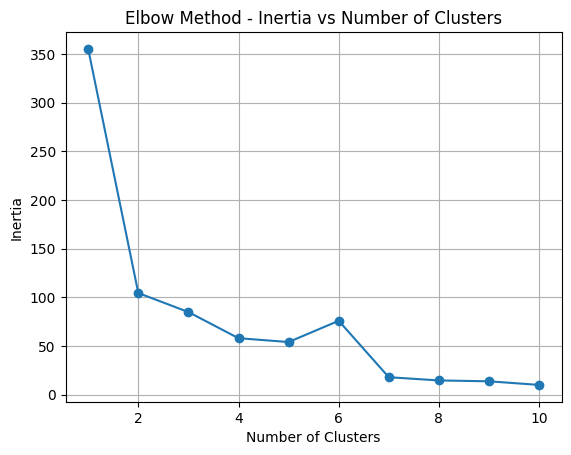

In [22]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [23]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [24]:
centroids = random_centroids(threshold_0_norm, 5)

In [25]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,1.46,6.61,1.25,3.06,1.97
tc_loss_ha_total,1.56,9.03,1.11,4.40,1.15


In [26]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [27]:
labels = get_labels(threshold_0_norm, centroids)

In [28]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,9
1,1,5
2,2,8
3,3,4
4,4,7


In [29]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_0_norm, labels, k):
  return threshold_0_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [30]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_0_norm.columns if "tc_loss_ha_total" in col]
X = threshold_0_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_0_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,6
1,1,9
2,2,2
3,3,7
4,4,9


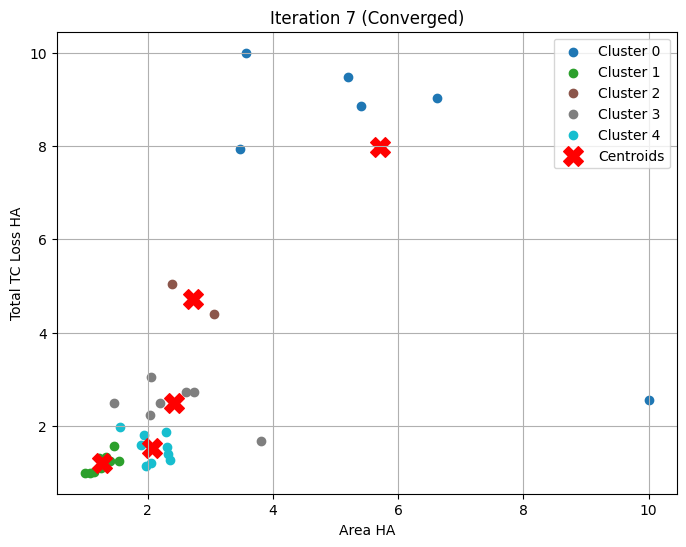

In [31]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,5.71,7.98
1,Cluster 1,1.27,1.21
2,Cluster 2,2.72,4.72
3,Cluster 3,2.42,2.49
4,Cluster 4,2.08,1.54


In [33]:
threshold_0_norm['subnational1'] = threshold_data[0]['subnational1'].values
threshold_0_final = threshold_0_norm.reset_index().rename(columns={'index': 'No'})
threshold_0_final = threshold_0_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_0_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.73,3,Aceh
1,1,1.14,1.02,1,Bali
2,2,1.46,2.49,3,Bangka Belitung
3,3,1.25,1.11,1,Banten
4,4,1.55,1.97,4,Bengkulu
5,5,1.33,1.33,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.03,2,Jambi
8,8,2.05,1.22,4,Jawa Barat
9,9,1.97,1.15,4,Jawa Tengah


In [34]:
# Simpan daftar wilayah per cluster
threshold_0_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_0_norm[threshold_0_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_0_clusters[cluster_num] = cluster_data

In [35]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_0_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,0,6,Sumatera Selatan
6,1,1,Bali
7,1,2,Banten
8,1,3,Gorontalo
9,1,4,Jakarta Raya


In [36]:
# THRESHOLD 10
threshold_10_raw = threshold_data[10][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [37]:
threshold_10_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,820472,Aceh
1,559069,8755,Bali
2,1675822,682304,Bangka Belitung
3,935222,49707,Banten
4,1981467,459731,Bengkulu
5,1204187,143982,Gorontalo
6,65355,27,Jakarta Raya
7,4896339,1927911,Jambi
8,3705873,95035,Jawa Barat
9,3443678,62717,Jawa Tengah


In [38]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_10_norm = threshold_10_raw[features].copy()
threshold_10_norm = (threshold_10_norm - threshold_10_norm.min()) / (threshold_10_norm.max() - threshold_10_norm.min()) * 9 + 1

In [39]:
threshold_10_norm.describe()

,area_ha,tc_loss_ha_total
count,33.00,33.00
mean,2.63,3.01
std,1.86,2.80
min,1.00,1.00
25%,1.46,1.26
50%,2.06,1.71
75%,2.74,2.75
max,10.00,10.00


In [40]:
threshold_10_norm

,area_ha,tc_loss_ha_total
0,2.61,2.74
1,1.14,1.02
2,1.46,2.45
3,1.25,1.11
4,1.55,1.98
5,1.33,1.31
6,1.00,1.00
7,2.39,5.09
8,2.05,1.20
9,1.97,1.13


In [41]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_10_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,360.73
1,2,105.34
2,3,84.78
3,4,79.67
4,5,20.13
5,6,19.52
6,7,15.77
7,8,12.20
8,9,12.43
9,10,12.26


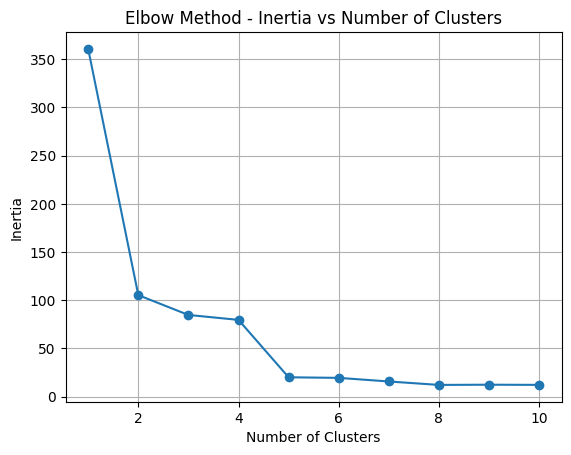

In [42]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [43]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [44]:
centroids = random_centroids(threshold_10_norm, 5)

In [45]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,2.19,1.55,3.81,1.97,2.03
tc_loss_ha_total,2.52,1.98,1.71,1.13,2.19


In [46]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [47]:
labels = get_labels(threshold_10_norm, centroids)

In [48]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,10
1,1,5
2,2,3
3,3,13
4,4,2


In [49]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_10_norm, labels, k):
  return threshold_10_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [50]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_10_norm.columns if "tc_loss_ha_total" in col]
X = threshold_10_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_10_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,6
1,1,9
2,2,5
3,3,7
4,4,6


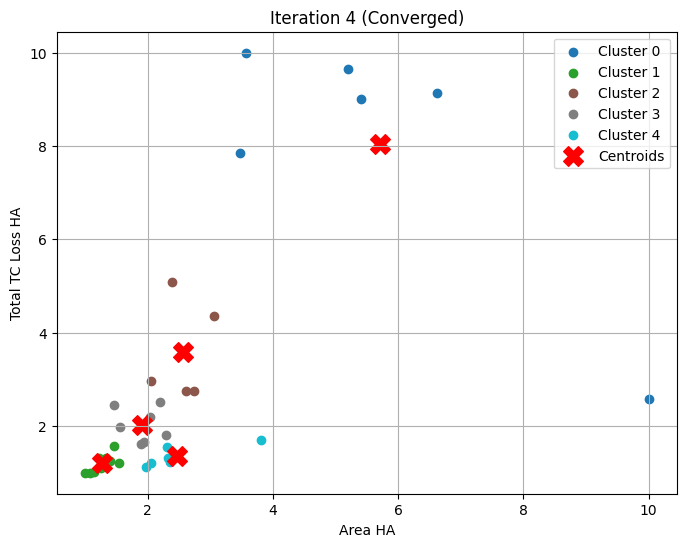

In [51]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,5.71,8.04
1,Cluster 1,1.27,1.20
2,Cluster 2,2.57,3.58
3,Cluster 3,1.91,2.03
4,Cluster 4,2.47,1.36


In [53]:
threshold_10_norm['subnational1'] = threshold_data[10]['subnational1'].values
threshold_10_final = threshold_10_norm.reset_index().rename(columns={'index': 'No'})
threshold_10_final = threshold_10_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_10_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.74,2,Aceh
1,1,1.14,1.02,1,Bali
2,2,1.46,2.45,3,Bangka Belitung
3,3,1.25,1.11,1,Banten
4,4,1.55,1.98,3,Bengkulu
5,5,1.33,1.31,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.09,2,Jambi
8,8,2.05,1.20,4,Jawa Barat
9,9,1.97,1.13,4,Jawa Tengah


In [54]:
# Simpan daftar wilayah per cluster
threshold_10_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_10_norm[threshold_10_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_10_clusters[cluster_num] = cluster_data

In [55]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_10_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,0,6,Sumatera Selatan
6,1,1,Bali
7,1,2,Banten
8,1,3,Gorontalo
9,1,4,Jakarta Raya


In [56]:
# THRESHOLD 15
threshold_15_raw = threshold_data[15][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [57]:
threshold_15_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,817494,Aceh
1,559069,8628,Bali
2,1675822,678872,Bangka Belitung
3,935222,49397,Banten
4,1981467,458570,Bengkulu
5,1204187,142715,Gorontalo
6,65355,27,Jakarta Raya
7,4896339,1924178,Jambi
8,3705873,94104,Jawa Barat
9,3443678,61985,Jawa Tengah


In [58]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_15_norm = threshold_15_raw[features].copy()
threshold_15_norm = (threshold_15_norm - threshold_15_norm.min()) / (threshold_15_norm.max() - threshold_15_norm.min()) * 9 + 1

In [59]:
threshold_15_norm.describe()

,area_ha,tc_loss_ha_total
count,33.00,33.00
mean,2.63,3.01
std,1.86,2.80
min,1.00,1.00
25%,1.46,1.26
50%,2.06,1.71
75%,2.74,2.74
max,10.00,10.00


In [60]:
threshold_15_norm

,area_ha,tc_loss_ha_total
0,2.61,2.74
1,1.14,1.02
2,1.46,2.45
3,1.25,1.11
4,1.55,1.98
5,1.33,1.30
6,1.00,1.00
7,2.39,5.10
8,2.05,1.20
9,1.97,1.13


In [61]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_15_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,360.53
1,2,105.29
2,3,84.74
3,4,79.66
4,5,20.15
5,6,19.59
6,7,15.75
7,8,12.26
8,9,12.49
9,10,12.32


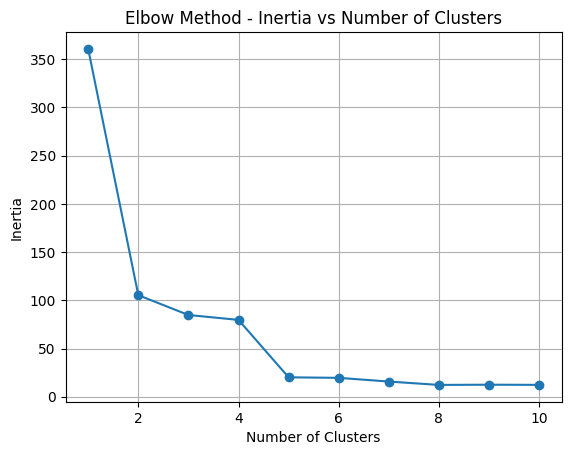

In [62]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [63]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [64]:
centroids = random_centroids(threshold_15_norm, 5)

In [65]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,2.19,1.55,3.81,1.97,2.03
tc_loss_ha_total,2.52,1.98,1.71,1.13,2.19


In [66]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [67]:
labels = get_labels(threshold_15_norm, centroids)

In [68]:
# Menampilkan jumlah data per cluster secara rapi
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,10
1,1,5
2,2,3
3,3,13
4,4,2


In [69]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_15_norm, labels, k):
  return threshold_15_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [70]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_15_norm.columns if "tc_loss_ha_total" in col]
X = threshold_15_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_15_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,6
1,1,9
2,2,5
3,3,7
4,4,6


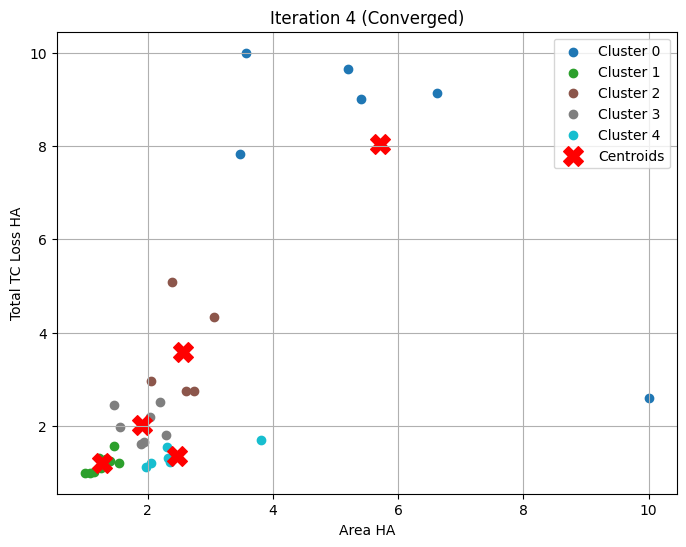

In [71]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,5.71,8.04
1,Cluster 1,1.27,1.20
2,Cluster 2,2.57,3.58
3,Cluster 3,1.91,2.03
4,Cluster 4,2.47,1.36


In [73]:
threshold_15_norm['subnational1'] = threshold_data[15]['subnational1'].values
threshold_15_final = threshold_15_norm.reset_index().rename(columns={'index': 'No'})
threshold_15_final = threshold_15_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_15_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.74,2,Aceh
1,1,1.14,1.02,1,Bali
2,2,1.46,2.45,3,Bangka Belitung
3,3,1.25,1.11,1,Banten
4,4,1.55,1.98,3,Bengkulu
5,5,1.33,1.30,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.10,2,Jambi
8,8,2.05,1.20,4,Jawa Barat
9,9,1.97,1.13,4,Jawa Tengah


In [74]:
# Simpan daftar wilayah per cluster
threshold_15_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_15_norm[threshold_15_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_15_clusters[cluster_num] = cluster_data

In [75]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_15_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,0,6,Sumatera Selatan
6,1,1,Bali
7,1,2,Banten
8,1,3,Gorontalo
9,1,4,Jakarta Raya


In [76]:
# THRESHOLD 20
threshold_20_raw = threshold_data[20][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [77]:
threshold_20_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,815185,Aceh
1,559069,8520,Bali
2,1675822,675980,Bangka Belitung
3,935222,49106,Banten
4,1981467,457547,Bengkulu
5,1204187,141886,Gorontalo
6,65355,27,Jakarta Raya
7,4896339,1920137,Jambi
8,3705873,93311,Jawa Barat
9,3443678,61259,Jawa Tengah


In [78]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_20_norm = threshold_20_raw[features].copy()
threshold_20_norm = (threshold_20_norm - threshold_20_norm.min()) / (threshold_20_norm.max() - threshold_20_norm.min()) * 9 + 1

In [79]:
threshold_20_norm.describe()

,area_ha,tc_loss_ha_total
count,33.00,33.00
mean,2.63,3.01
std,1.86,2.80
min,1.00,1.00
25%,1.46,1.26
50%,2.06,1.71
75%,2.74,2.74
max,10.00,10.00


In [80]:
threshold_20_norm

,area_ha,tc_loss_ha_total
0,2.61,2.74
1,1.14,1.02
2,1.46,2.44
3,1.25,1.10
4,1.55,1.98
5,1.33,1.30
6,1.00,1.00
7,2.39,5.10
8,2.05,1.20
9,1.97,1.13


In [81]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_20_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,360.55
1,2,105.30
2,3,84.74
3,4,79.69
4,5,20.21
5,6,19.65
6,7,15.80
7,8,12.31
8,9,12.60
9,10,12.37


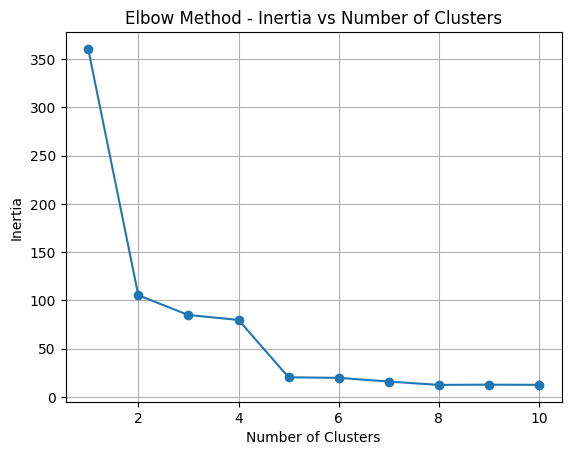

In [82]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [83]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [84]:
centroids = random_centroids(threshold_20_norm, 5)

In [85]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,2.19,1.55,3.81,1.97,2.03
tc_loss_ha_total,2.52,1.98,1.71,1.13,2.19


In [86]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [87]:
labels = get_labels(threshold_20_norm, centroids)

In [88]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,10
1,1,5
2,2,3
3,3,13
4,4,2


In [89]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_20_norm, labels, k):
  return threshold_20_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [90]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_20_norm.columns if "tc_loss_ha_total" in col]
X = threshold_20_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_20_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,6
1,1,9
2,2,5
3,3,7
4,4,6


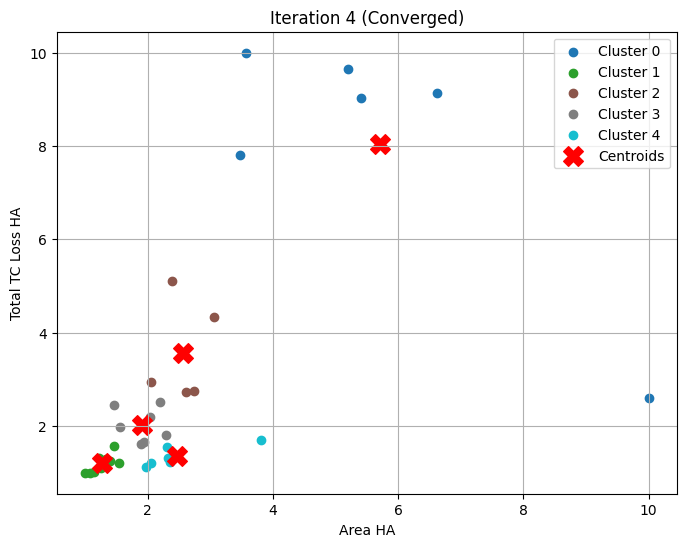

In [91]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,5.71,8.04
1,Cluster 1,1.27,1.20
2,Cluster 2,2.57,3.58
3,Cluster 3,1.91,2.03
4,Cluster 4,2.47,1.35


In [93]:
threshold_20_norm['subnational1'] = threshold_data[20]['subnational1'].values
threshold_20_final = threshold_20_norm.reset_index().rename(columns={'index': 'No'})
threshold_20_final = threshold_20_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_20_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.74,2,Aceh
1,1,1.14,1.02,1,Bali
2,2,1.46,2.44,3,Bangka Belitung
3,3,1.25,1.10,1,Banten
4,4,1.55,1.98,3,Bengkulu
5,5,1.33,1.30,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.10,2,Jambi
8,8,2.05,1.20,4,Jawa Barat
9,9,1.97,1.13,4,Jawa Tengah


In [94]:
# Simpan daftar wilayah per cluster
threshold_20_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_20_norm[threshold_20_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_20_clusters[cluster_num] = cluster_data

In [95]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_20_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,0,6,Sumatera Selatan
6,1,1,Bali
7,1,2,Banten
8,1,3,Gorontalo
9,1,4,Jakarta Raya


In [96]:
# THRESHOLD 25
threshold_25_raw = threshold_data[25][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [97]:
threshold_25_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,813944,Aceh
1,559069,8451,Bali
2,1675822,674227,Bangka Belitung
3,935222,48924,Banten
4,1981467,456994,Bengkulu
5,1204187,141417,Gorontalo
6,65355,26,Jakarta Raya
7,4896339,1918103,Jambi
8,3705873,92518,Jawa Barat
9,3443678,60474,Jawa Tengah


In [98]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_25_norm = threshold_25_raw[features].copy()
threshold_25_norm = (threshold_25_norm - threshold_25_norm.min()) / (threshold_25_norm.max() - threshold_25_norm.min()) * 9 + 1

In [99]:
threshold_25_norm.describe()

,area_ha,tc_loss_ha_total
count,33.00,33.00
mean,2.63,3.00
std,1.86,2.80
min,1.00,1.00
25%,1.46,1.26
50%,2.06,1.71
75%,2.74,2.74
max,10.00,10.00


In [100]:
threshold_25_norm

,area_ha,tc_loss_ha_total
0,2.61,2.74
1,1.14,1.02
2,1.46,2.44
3,1.25,1.10
4,1.55,1.98
5,1.33,1.30
6,1.00,1.00
7,2.39,5.10
8,2.05,1.20
9,1.97,1.13


In [101]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_25_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,360.39
1,2,105.28
2,3,84.72
3,4,79.68
4,5,20.24
5,6,19.69
6,7,15.82
7,8,12.34
8,9,12.62
9,10,12.40


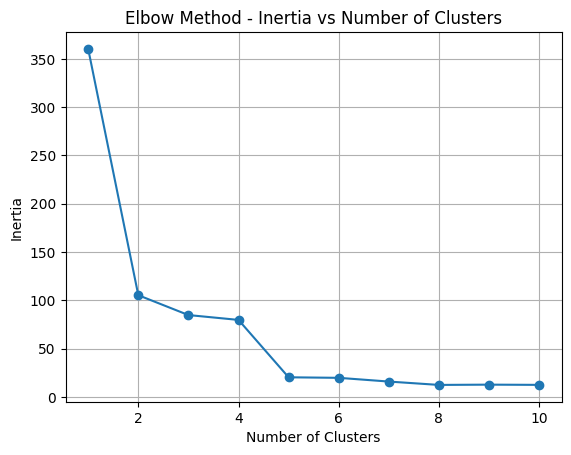

In [102]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [103]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [104]:
centroids = random_centroids(threshold_25_norm, 5)

In [105]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,2.19,1.55,3.81,1.97,2.03
tc_loss_ha_total,2.52,1.98,1.71,1.13,2.19


In [106]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [107]:
labels = get_labels(threshold_25_norm, centroids)

In [108]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,10
1,1,5
2,2,3
3,3,13
4,4,2


In [109]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_25_norm, labels, k):
  return threshold_25_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [110]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_25_norm.columns if "tc_loss_ha_total" in col]
X = threshold_25_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_25_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,6
1,1,9
2,2,5
3,3,7
4,4,6


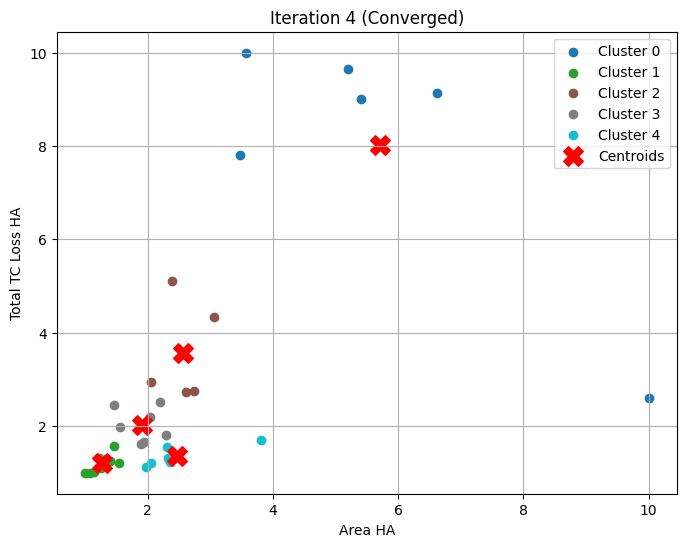

In [111]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,5.71,8.03
1,Cluster 1,1.27,1.20
2,Cluster 2,2.57,3.57
3,Cluster 3,1.91,2.03
4,Cluster 4,2.47,1.35


In [113]:
threshold_25_norm['subnational1'] = threshold_data[25]['subnational1'].values
threshold_25_final = threshold_25_norm.reset_index().rename(columns={'index': 'No'})
threshold_25_final = threshold_25_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_25_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.74,2,Aceh
1,1,1.14,1.02,1,Bali
2,2,1.46,2.44,3,Bangka Belitung
3,3,1.25,1.10,1,Banten
4,4,1.55,1.98,3,Bengkulu
5,5,1.33,1.30,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.10,2,Jambi
8,8,2.05,1.20,4,Jawa Barat
9,9,1.97,1.13,4,Jawa Tengah


In [114]:
# Simpan daftar wilayah per cluster
threshold_25_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_25_norm[threshold_25_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_25_clusters[cluster_num] = cluster_data

In [115]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_25_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,0,6,Sumatera Selatan
6,1,1,Bali
7,1,2,Banten
8,1,3,Gorontalo
9,1,4,Jakarta Raya


In [116]:
# THRESHOLD 30
threshold_30_raw = threshold_data[30][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [117]:
threshold_30_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,810853,Aceh
1,559069,8357,Bali
2,1675822,671075,Bangka Belitung
3,935222,48582,Banten
4,1981467,455918,Bengkulu
5,1204187,140235,Gorontalo
6,65355,24,Jakarta Raya
7,4896339,1914650,Jambi
8,3705873,91492,Jawa Barat
9,3443678,59619,Jawa Tengah


In [118]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_30_norm = threshold_30_raw[features].copy()
threshold_30_norm = (threshold_30_norm - threshold_30_norm.min()) / (threshold_30_norm.max() - threshold_30_norm.min()) * 9 + 1

In [119]:
threshold_30_norm.describe()

,area_ha,tc_loss_ha_total
count,33.00,33.00
mean,2.63,3.00
std,1.86,2.79
min,1.00,1.00
25%,1.46,1.26
50%,2.06,1.71
75%,2.74,2.74
max,10.00,10.00


In [120]:
threshold_30_norm

,area_ha,tc_loss_ha_total
0,2.61,2.74
1,1.14,1.02
2,1.46,2.44
3,1.25,1.10
4,1.55,1.98
5,1.33,1.30
6,1.00,1.00
7,2.39,5.10
8,2.05,1.20
9,1.97,1.13


In [121]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_30_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,360.03
1,2,105.21
2,3,84.66
3,4,79.65
4,5,20.30
5,6,20.09
6,7,15.88
7,8,12.40
8,9,12.68
9,10,12.46


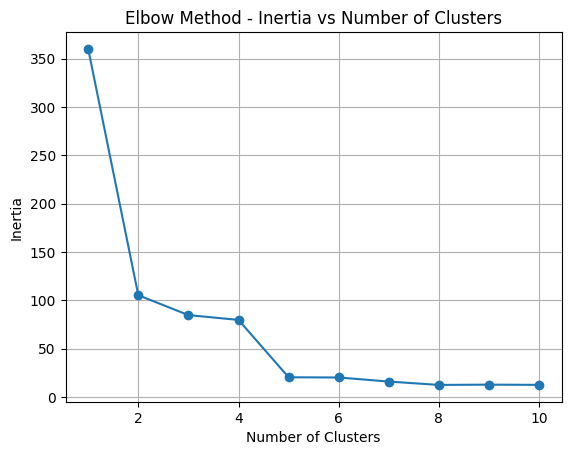

In [122]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [123]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [124]:
centroids = random_centroids(threshold_30_norm, 5)

In [125]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,2.19,1.55,3.81,1.97,2.03
tc_loss_ha_total,2.52,1.98,1.71,1.13,2.18


In [126]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [127]:
labels = get_labels(threshold_30_norm, centroids)

In [128]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,10
1,1,5
2,2,3
3,3,13
4,4,2


In [129]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_30_norm, labels, k):
  return threshold_30_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [130]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_30_norm.columns if "tc_loss_ha_total" in col]
X = threshold_30_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_30_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,6
1,1,9
2,2,5
3,3,7
4,4,6


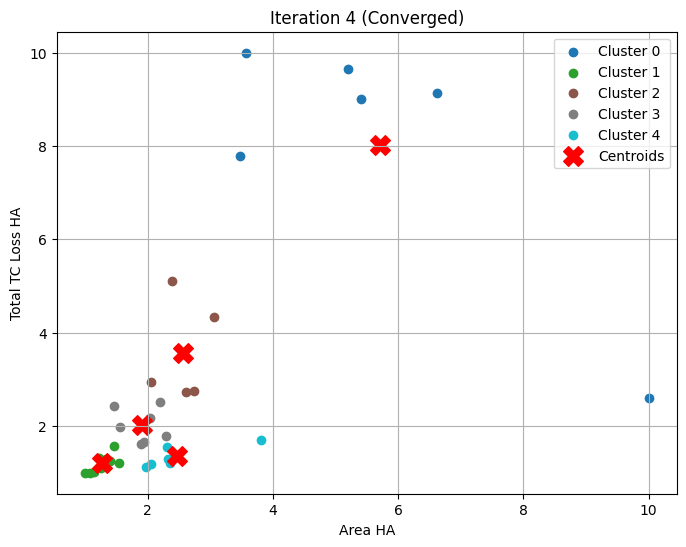

In [131]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,5.71,8.03
1,Cluster 1,1.27,1.20
2,Cluster 2,2.57,3.57
3,Cluster 3,1.91,2.02
4,Cluster 4,2.47,1.35


In [133]:
threshold_30_norm['subnational1'] = threshold_data[30]['subnational1'].values
threshold_30_final = threshold_30_norm.reset_index().rename(columns={'index': 'No'})
threshold_30_final = threshold_30_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_30_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.74,2,Aceh
1,1,1.14,1.02,1,Bali
2,2,1.46,2.44,3,Bangka Belitung
3,3,1.25,1.10,1,Banten
4,4,1.55,1.98,3,Bengkulu
5,5,1.33,1.30,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.10,2,Jambi
8,8,2.05,1.20,4,Jawa Barat
9,9,1.97,1.13,4,Jawa Tengah


In [134]:
# Simpan daftar wilayah per cluster
threshold_30_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_30_norm[threshold_30_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_30_clusters[cluster_num] = cluster_data

In [135]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_30_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,0,6,Sumatera Selatan
6,1,1,Bali
7,1,2,Banten
8,1,3,Gorontalo
9,1,4,Jakarta Raya


In [136]:
# THRESHOLD 50
threshold_50_raw = threshold_data[50][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [137]:
threshold_50_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,796700,Aceh
1,559069,7807,Bali
2,1675822,650465,Bangka Belitung
3,935222,46687,Banten
4,1981467,449659,Bengkulu
5,1204187,135743,Gorontalo
6,65355,19,Jakarta Raya
7,4896339,1893069,Jambi
8,3705873,85733,Jawa Barat
9,3443678,54376,Jawa Tengah


In [138]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_50_norm = threshold_50_raw[features].copy()
threshold_50_norm = (threshold_50_norm - threshold_50_norm.min()) / (threshold_50_norm.max() - threshold_50_norm.min()) * 9 + 1

In [139]:
threshold_50_norm.describe()

,area_ha,tc_loss_ha_total
count,33.00,33.00
mean,2.63,2.99
std,1.86,2.78
min,1.00,1.00
25%,1.46,1.26
50%,2.06,1.71
75%,2.74,2.74
max,10.00,10.00


In [140]:
threshold_50_norm

,area_ha,tc_loss_ha_total
0,2.61,2.73
1,1.14,1.02
2,1.46,2.41
3,1.25,1.10
4,1.55,1.98
5,1.33,1.29
6,1.00,1.00
7,2.39,5.11
8,2.05,1.19
9,1.97,1.12


In [141]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_50_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,357.28
1,2,104.91
2,3,84.34
3,4,79.48
4,5,20.72
5,6,20.26
6,7,15.20
7,8,14.05
8,9,13.09
9,10,12.39


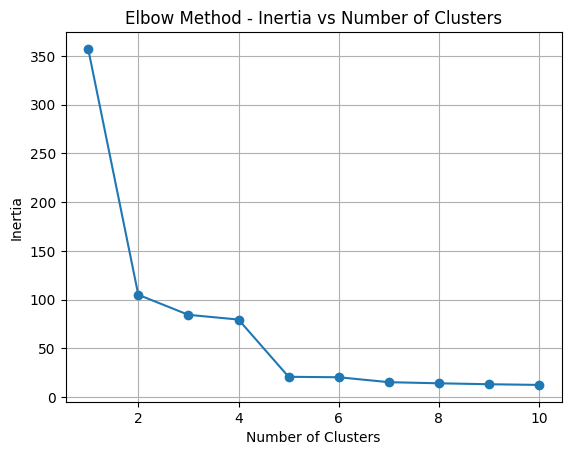

In [142]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [143]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [144]:
centroids = random_centroids(threshold_50_norm, 5)

In [145]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,2.19,1.55,3.81,1.97,2.03
tc_loss_ha_total,2.52,1.98,1.71,1.12,2.17


In [146]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [147]:
labels = get_labels(threshold_50_norm, centroids)

In [148]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,10
1,1,5
2,2,3
3,3,13
4,4,2


In [149]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_50_norm, labels, k):
  return threshold_50_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [150]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_50_norm.columns if "tc_loss_ha_total" in col]
X = threshold_50_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_50_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,6
1,1,9
2,2,5
3,3,7
4,4,6


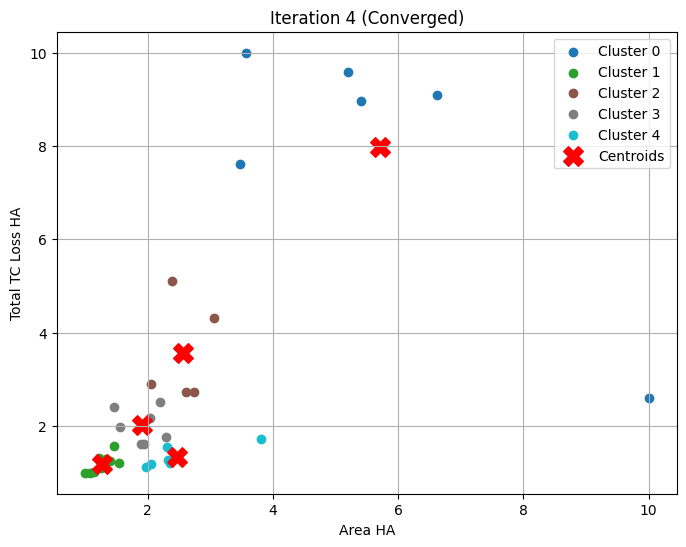

In [151]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [152]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,5.71,7.98
1,Cluster 1,1.27,1.20
2,Cluster 2,2.57,3.56
3,Cluster 3,1.91,2.01
4,Cluster 4,2.47,1.34


In [153]:
threshold_50_norm['subnational1'] = threshold_data[50]['subnational1'].values
threshold_50_final = threshold_50_norm.reset_index().rename(columns={'index': 'No'})
threshold_50_final = threshold_50_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_50_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.73,2,Aceh
1,1,1.14,1.02,1,Bali
2,2,1.46,2.41,3,Bangka Belitung
3,3,1.25,1.10,1,Banten
4,4,1.55,1.98,3,Bengkulu
5,5,1.33,1.29,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.11,2,Jambi
8,8,2.05,1.19,4,Jawa Barat
9,9,1.97,1.12,4,Jawa Tengah


In [154]:
# Simpan daftar wilayah per cluster
threshold_50_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_50_norm[threshold_50_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_50_clusters[cluster_num] = cluster_data

In [155]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_50_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,0,6,Sumatera Selatan
6,1,1,Bali
7,1,2,Banten
8,1,3,Gorontalo
9,1,4,Jakarta Raya


In [156]:
# THRESHOLD 75
threshold_75_raw = threshold_data[75][features + ['subnational1']].copy().dropna().reset_index(drop=True)

In [157]:
threshold_75_raw

,area_ha,tc_loss_ha_total,subnational1
0,5683651,727448,Aceh
1,559069,6294,Bali
2,1675822,547449,Bangka Belitung
3,935222,39392,Banten
4,1981467,422685,Bengkulu
5,1204187,119828,Gorontalo
6,65355,6,Jakarta Raya
7,4896339,1767756,Jambi
8,3705873,68313,Jawa Barat
9,3443678,39552,Jawa Tengah


In [158]:
# Menormalisasi data ke rentang 1 hingga 10
threshold_75_norm = threshold_75_raw[features].copy()
threshold_75_norm = (threshold_75_norm - threshold_75_norm.min()) / (threshold_75_norm.max() - threshold_75_norm.min()) * 9 + 1

In [159]:
threshold_75_norm.describe()

,area_ha,tc_loss_ha_total
count,33.00,33.00
mean,2.63,2.91
std,1.86,2.68
min,1.00,1.00
25%,1.46,1.22
50%,2.06,1.68
75%,2.74,2.70
max,10.00,10.00


In [160]:
threshold_75_norm

,area_ha,tc_loss_ha_total
0,2.61,2.68
1,1.14,1.01
2,1.46,2.27
3,1.25,1.09
4,1.55,1.98
5,1.33,1.28
6,1.00,1.00
7,2.39,5.09
8,2.05,1.16
9,1.97,1.09


In [161]:
# Menghitung inertia untuk berbagai jumlah cluster
X_norm = threshold_75_norm.to_numpy()
max_iter = 100

inertia_values = []
k_range = range(1, 11)  # Uji untuk jumlah cluster dari 1 hingga 10

for k in k_range:
    # Inisialisasi centroid secara acak
    centroids = X_norm[np.random.choice(X_norm.shape[0], k, replace=False)]

    # Iterasi K-Means
    for _ in range(max_iter):
        # Hitung jarak dari setiap titik ke centroid
        distances = np.linalg.norm(X_norm[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

        # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
        new_centroids = np.array([X_norm[clusters == i].mean(axis=0) for i in range(k)])

        # Jika centroid tidak berubah, berarti konvergen
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Hitung inertia
    inertia = np.sum((X_norm - centroids[clusters]) ** 2)
    inertia_values.append(inertia)

# Membuat DataFrame dari hasil inertia
inertia_df = pd.DataFrame({
    'Cluster (k)': list(k_range),
    'Inertia': inertia_values
})

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
inertia_df

,Cluster (k),Inertia
0,1,340.17
1,2,102.67
2,3,82.47
3,4,78.93
4,5,18.83
5,6,22.18
6,7,66.44
7,8,11.79
8,9,11.90
9,10,10.74


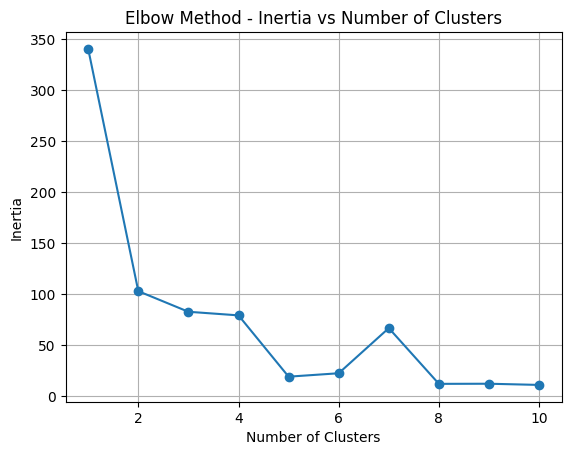

In [162]:
# Plot Elbow Method untuk Inertia
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [163]:
# Fungsi untuk menentukan centroid acak
def random_centroids(data, k):
    numeric_data = data[["area_ha", "tc_loss_ha_total"]]  # hanya ambil kolom numerik
    centroids = []
    for _ in range(k):
        random_point = numeric_data.sample(n=1).values.flatten()
        centroids.append(random_point)
    return np.array(centroids)

In [164]:
centroids = random_centroids(threshold_75_norm, 5)

In [165]:
centroids_df = pd.DataFrame(centroids.T, index=["area_ha", "tc_loss_ha_total"])
centroids_df

,0,1,2,3,4
area_ha,2.19,1.55,3.81,1.97,2.03
tc_loss_ha_total,2.52,1.98,1.73,1.09,2.11


In [166]:
# Fungsi untuk menentukan label berdasarkan jarak ke centroid
def get_labels(data, centroids):
    X = data[["area_ha", "tc_loss_ha_total"]].values
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # [n_samples, k]
    labels = np.argmin(distances, axis=1)
    return labels

In [167]:
labels = get_labels(threshold_75_norm, centroids)

In [168]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(labels, name="Cluster").value_counts().sort_index()

# Ubah ke DataFrame
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Jumlah Data']

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,10
1,1,5
2,2,3
3,3,13
4,4,2


In [169]:
# Fungsi untuk menghitung centroid baru
def new_centroids(threshold_75_norm, labels, k):
  return threshold_75_norm.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [170]:
# Pilih kolom kehilangan lahan (tc_loss_ha) dan kolom area
tc_loss_columns = [col for col in threshold_75_norm.columns if "tc_loss_ha_total" in col]
X = threshold_75_norm[["area_ha", "tc_loss_ha_total"]].values  # Ambil hanya kolom yang relevan untuk clustering

# Tentukan jumlah cluster
k = 5
np.random.seed(42)

# Inisialisasi centroid secara acak (memilih k titik data secara acak)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Iterasi K-Means
max_iter = 100
iteration = 0
for _ in range(max_iter):
    iteration += 1  # Meningkatkan iterasi

    # Hitung jarak dari setiap titik ke centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Menghitung jarak Euclidean ke setiap centroid
    clusters = np.argmin(distances, axis=1)  # Pilih cluster terdekat berdasarkan jarak minimum

    # Hitung centroid baru berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    # Jika centroid tidak berubah, berarti konvergen
    if np.all(centroids == new_centroids):
        # Update iterasi terakhir jika konvergen
        iteration_str = f"Iteration {iteration} (Converged)"
        break
    centroids = new_centroids  # Update centroid untuk iterasi berikutnya

# Tambahkan hasil clustering ke dataset
threshold_75_norm["Cluster"] = clusters

# Menampilkan jumlah data di tiap cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Buat DataFrame dari hasil clustering
cluster_counts_df = pd.DataFrame({
    "Cluster": list(cluster_counts.keys()),
    "Jumlah Data": list(cluster_counts.values())
})

# Tampilkan sebagai tabel
cluster_counts_df

,Cluster,Jumlah Data
0,0,5
1,1,9
2,2,3
3,3,7
4,4,9


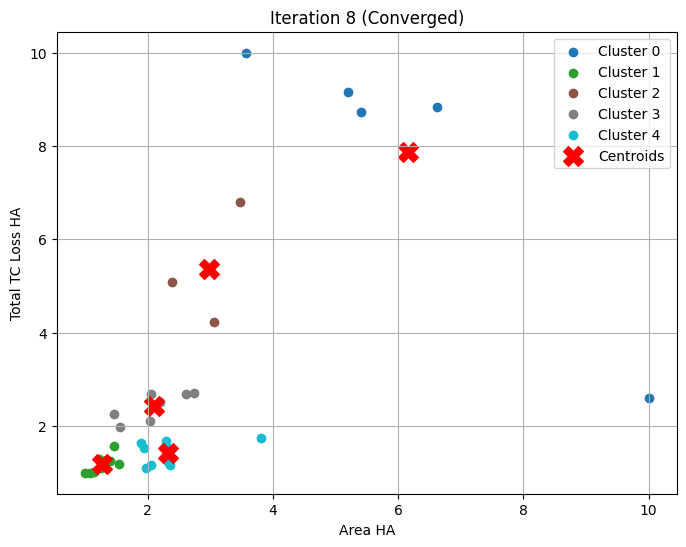

In [171]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Menggunakan colormap untuk menghasilkan warna secara otomatis
colors = plt.colormaps["tab10"](np.linspace(0, 1, k))  # tab10 adalah colormap dengan 10 warna yang berbeda

for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}', color=colors[i])  # Menyesuaikan warna dan label

# Menampilkan centroid
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Menampilkan plot dengan judul Iterasi
plt.title(iteration_str if 'iteration_str' in locals() else f'Iteration {iteration}')
plt.xlabel('Area HA')
plt.ylabel('Total TC Loss HA')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
# Menyimpan centroids ke dalam DataFrame
centroids_df = pd.DataFrame(centroids, columns=["area_ha", "tc_loss_ha_total"])

# Tambahkan kolom "Cluster" sebagai label indeks
centroids_df.insert(0, "Cluster", [f"Cluster {i}" for i in range(len(centroids_df))])

# Format dua desimal
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan sebagai tabel
centroids_df

,Cluster,area_ha,tc_loss_ha_total
0,Cluster 0,6.16,7.87
1,Cluster 1,1.27,1.19
2,Cluster 2,2.98,5.37
3,Cluster 3,2.09,2.42
4,Cluster 4,2.33,1.42


In [173]:
threshold_75_norm['subnational1'] = threshold_data[75]['subnational1'].values
threshold_75_final = threshold_75_norm.reset_index().rename(columns={'index': 'No'})
threshold_75_final = threshold_75_final[['No', 'area_ha', 'tc_loss_ha_total', 'Cluster', 'subnational1']]
threshold_75_final

,No,area_ha,tc_loss_ha_total,Cluster,subnational1
0,0,2.61,2.68,3,Aceh
1,1,1.14,1.01,1,Bali
2,2,1.46,2.27,3,Bangka Belitung
3,3,1.25,1.09,1,Banten
4,4,1.55,1.98,3,Bengkulu
5,5,1.33,1.28,1,Gorontalo
6,6,1.00,1.00,1,Jakarta Raya
7,7,2.39,5.09,2,Jambi
8,8,2.05,1.16,4,Jawa Barat
9,9,1.97,1.09,4,Jawa Tengah


In [174]:
# Simpan daftar wilayah per cluster
threshold_75_clusters = {}

for cluster_num in range(k):
    cluster_data = threshold_75_norm[threshold_75_norm["Cluster"] == cluster_num]["subnational1"].tolist()
    threshold_75_clusters[cluster_num] = cluster_data

In [175]:
# Konversi dictionary ke DataFrame
clustered_wilayah_list = []

for cluster_num, wilayah_list in threshold_75_clusters.items():
    for idx, wilayah in enumerate(wilayah_list, 1):
        clustered_wilayah_list.append({
            "Cluster": cluster_num,
            "No": idx,
            "Subnational1": wilayah
        })

# Buat DataFrame dari list dict
clustered_wilayah_df = pd.DataFrame(clustered_wilayah_list)

# Tampilkan sebagai tabel
clustered_wilayah_df

,Cluster,No,Subnational1
0,0,1,Kalimantan Barat
1,0,2,Kalimantan Tengah
2,0,3,Kalimantan Timur
3,0,4,Papua
4,0,5,Riau
5,1,1,Bali
6,1,2,Banten
7,1,3,Gorontalo
8,1,4,Jakarta Raya
9,1,5,Kepulauan Riau
